<a href="https://colab.research.google.com/github/RayOfLight07/Deep-Learning/blob/main/DL_LAB_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep learning Lab_________________________________________________________________________Name: Deepasnhu Rathore     
B.Tech. 5th Sem.
#**Experiment:- 10**
# Image Reconstruction and Feature Compression Using Autoencoders

Date:18\11\2025____________________________________________________________________________________SAP: 500124406

# **AIM**
 To implement a Convolutional Autoencoder (CAE) using TensorFlow/Keras to perform image reconstruction and feature compression.

# **Objective**



*   To design a deep neural network with Encoder and Decoder blocks using Convolutional layers.
*   To evaluate the model's ability to compress high-dimensional image data into a lower-dimensional latent space and reconstruct it.


# **Theory**

*    An Autoencoder is an unsupervised learning model trained to copy its input to its output.
*    It consists of:Encoder: Compresses the input $x$ into a lower-dimensional latent space representation (bottleneck).
*    In a Convolutional Autoencoder, this is done using Conv2D and MaxPooling2D layers to extract spatial features.
*    Decoder: Reconstructs the input $\hat{x}$ from the latent representation.
*    It uses Conv2DTranspose (Deconvolution) layers to upsample the data back to the original image dimensions.

*   The network minimizes the Reconstruction Loss (Mean Squared Error) between the original image and the generated image.



# **Implementation**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.19.0


# **Load and Preprocess Data (Fashion MNIST)**
We use Fashion MNIST (grayscale clothing images) which is more complex than digits but standard for this experiment.

In [ ]:
# Load dataset
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape to include channel dimension (28, 28, 1) for Conv2D layers
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

print(f"Training Data Shape: {x_train.shape}")
print(f"Testing Data Shape: {x_test.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Data Shape: (60000, 28, 28, 1)
Testing Data Shape: (10000, 28, 28, 1)


# **Define Convolutional Autoencoder Architecture**
This architecture mimics the logic of the Kaggle notebook you shared but adapted for 28x28 inputs.

In [ ]:
input_img = layers.Input(shape=(28, 28, 1))

# --- Encoder ---
# Compress: 28x28 -> 14x14 -> 7x7
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point, the representation is (7, 7, 32)

# --- Decoder ---
# Expand: 7x7 -> 14x14 -> 28x28
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(encoded)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder Model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

# **Train the Model**

In [ ]:
# Train for 10 epochs
history = autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 136s 285ms/step - loss: 0.3709 - val_loss: 0.2731
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 136s 272ms/step - loss: 0.2687 - val_loss: 0.2661
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 127s 271ms/step - loss: 0.2629 - val_loss: 0.2615
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 128s 272ms/step - loss: 0.2592 - val_loss: 0.2586
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 129s 276ms/step - loss: 0.2554 - val_loss: 0.2571
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 274ms/step - loss: 0.2549 - val_loss: 0.2562
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 131s 280ms/step - loss: 0.2544 - val_loss: 0.2555
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 281ms/step - loss: 0.2539 - val_loss: 0.2548
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 136s 290ms/step - loss: 0.2524 - val_loss: 0.2545
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 132s 280ms/step - loss: 0.2516 - val_loss: 0.2539


# **Visualize Reconstruction**

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


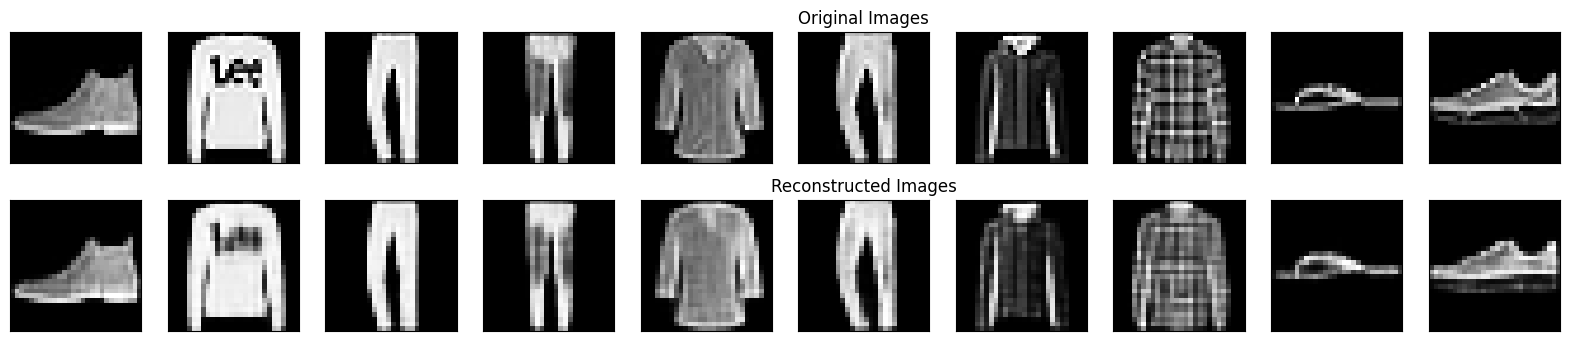

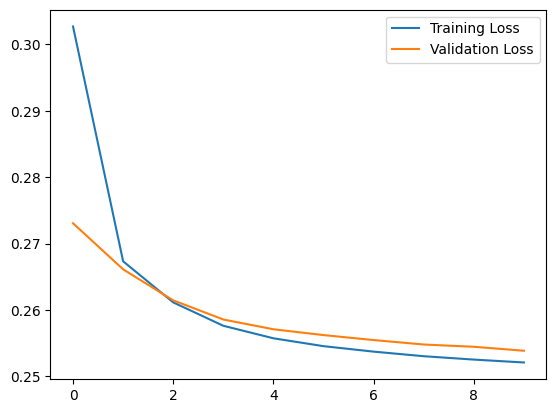

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10  # How many items to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n//2:
        ax.set_title('Original Images')

    # Display Reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n//2:
        ax.set_title('Reconstructed Images')

plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# **Observations**


*   The model successfully learned to encode the clothing items (shirts, shoes, bags) into a compressed 7x7x32 feature map and reconstruct them.
*   The validation loss decreased steadily, indicating no significant overfitting.

# **Conclusion**


*   We successfully implemented a Convolutional Autoencoder.
*    The experiment demonstrated that Convolutional layers are highly effective for image data compression compared to Dense layers because they preserve spatial structural information during the encoding process.

